# Visualisation des données
## observation des features pertinents pour la prédiction en consomation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import sklearn as skl
import seaborn as sns

In [8]:
### importation du dataframe nettoyé 

df = pd.read_csv('building-energy-benchmarking_final.csv',sep= ',')
df.head()

,Unnamed: 0,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ZipCode
0,0,1,2015,NonResidential,Hotel,659000030,7,DOWNTOWN,1927,1.0,...,6981428.0,2023032.0,1080307.0,12724.0,249.43,2.64,47.612190,-122.337997,405 OLIVE WAY,98101.0
1,1,2,2015,NonResidential,Hotel,659000220,7,DOWNTOWN,1996,1.0,...,8354235.0,0.0,1144563.0,44490.0,263.51,2.38,47.613106,-122.333358,724 PINE ST,98101.0
2,2,3,2015,NonResidential,Hotel,659000475,7,DOWNTOWN,1969,1.0,...,73130656.0,19660404.0,14583930.0,37099.0,2061.48,1.92,47.613349,-122.337699,1900 5TH AVE,98101.0
3,3,5,2015,NonResidential,Hotel,659000640,7,DOWNTOWN,1926,1.0,...,28229320.0,23458518.0,811521.0,20019.0,1936.34,31.38,47.614216,-122.336609,620 STEWART ST,98101.0
4,4,8,2015,NonResidential,Hotel,659000970,7,DOWNTOWN,1980,1.0,...,14829099.0,0.0,1777841.0,87631.0,507.70,4.02,47.613754,-122.340924,401 LENORA ST,98121.0


### Observtion des différentes réparations

    observation des différentes variables afin de déterminer des features pertinents pour la prédiction

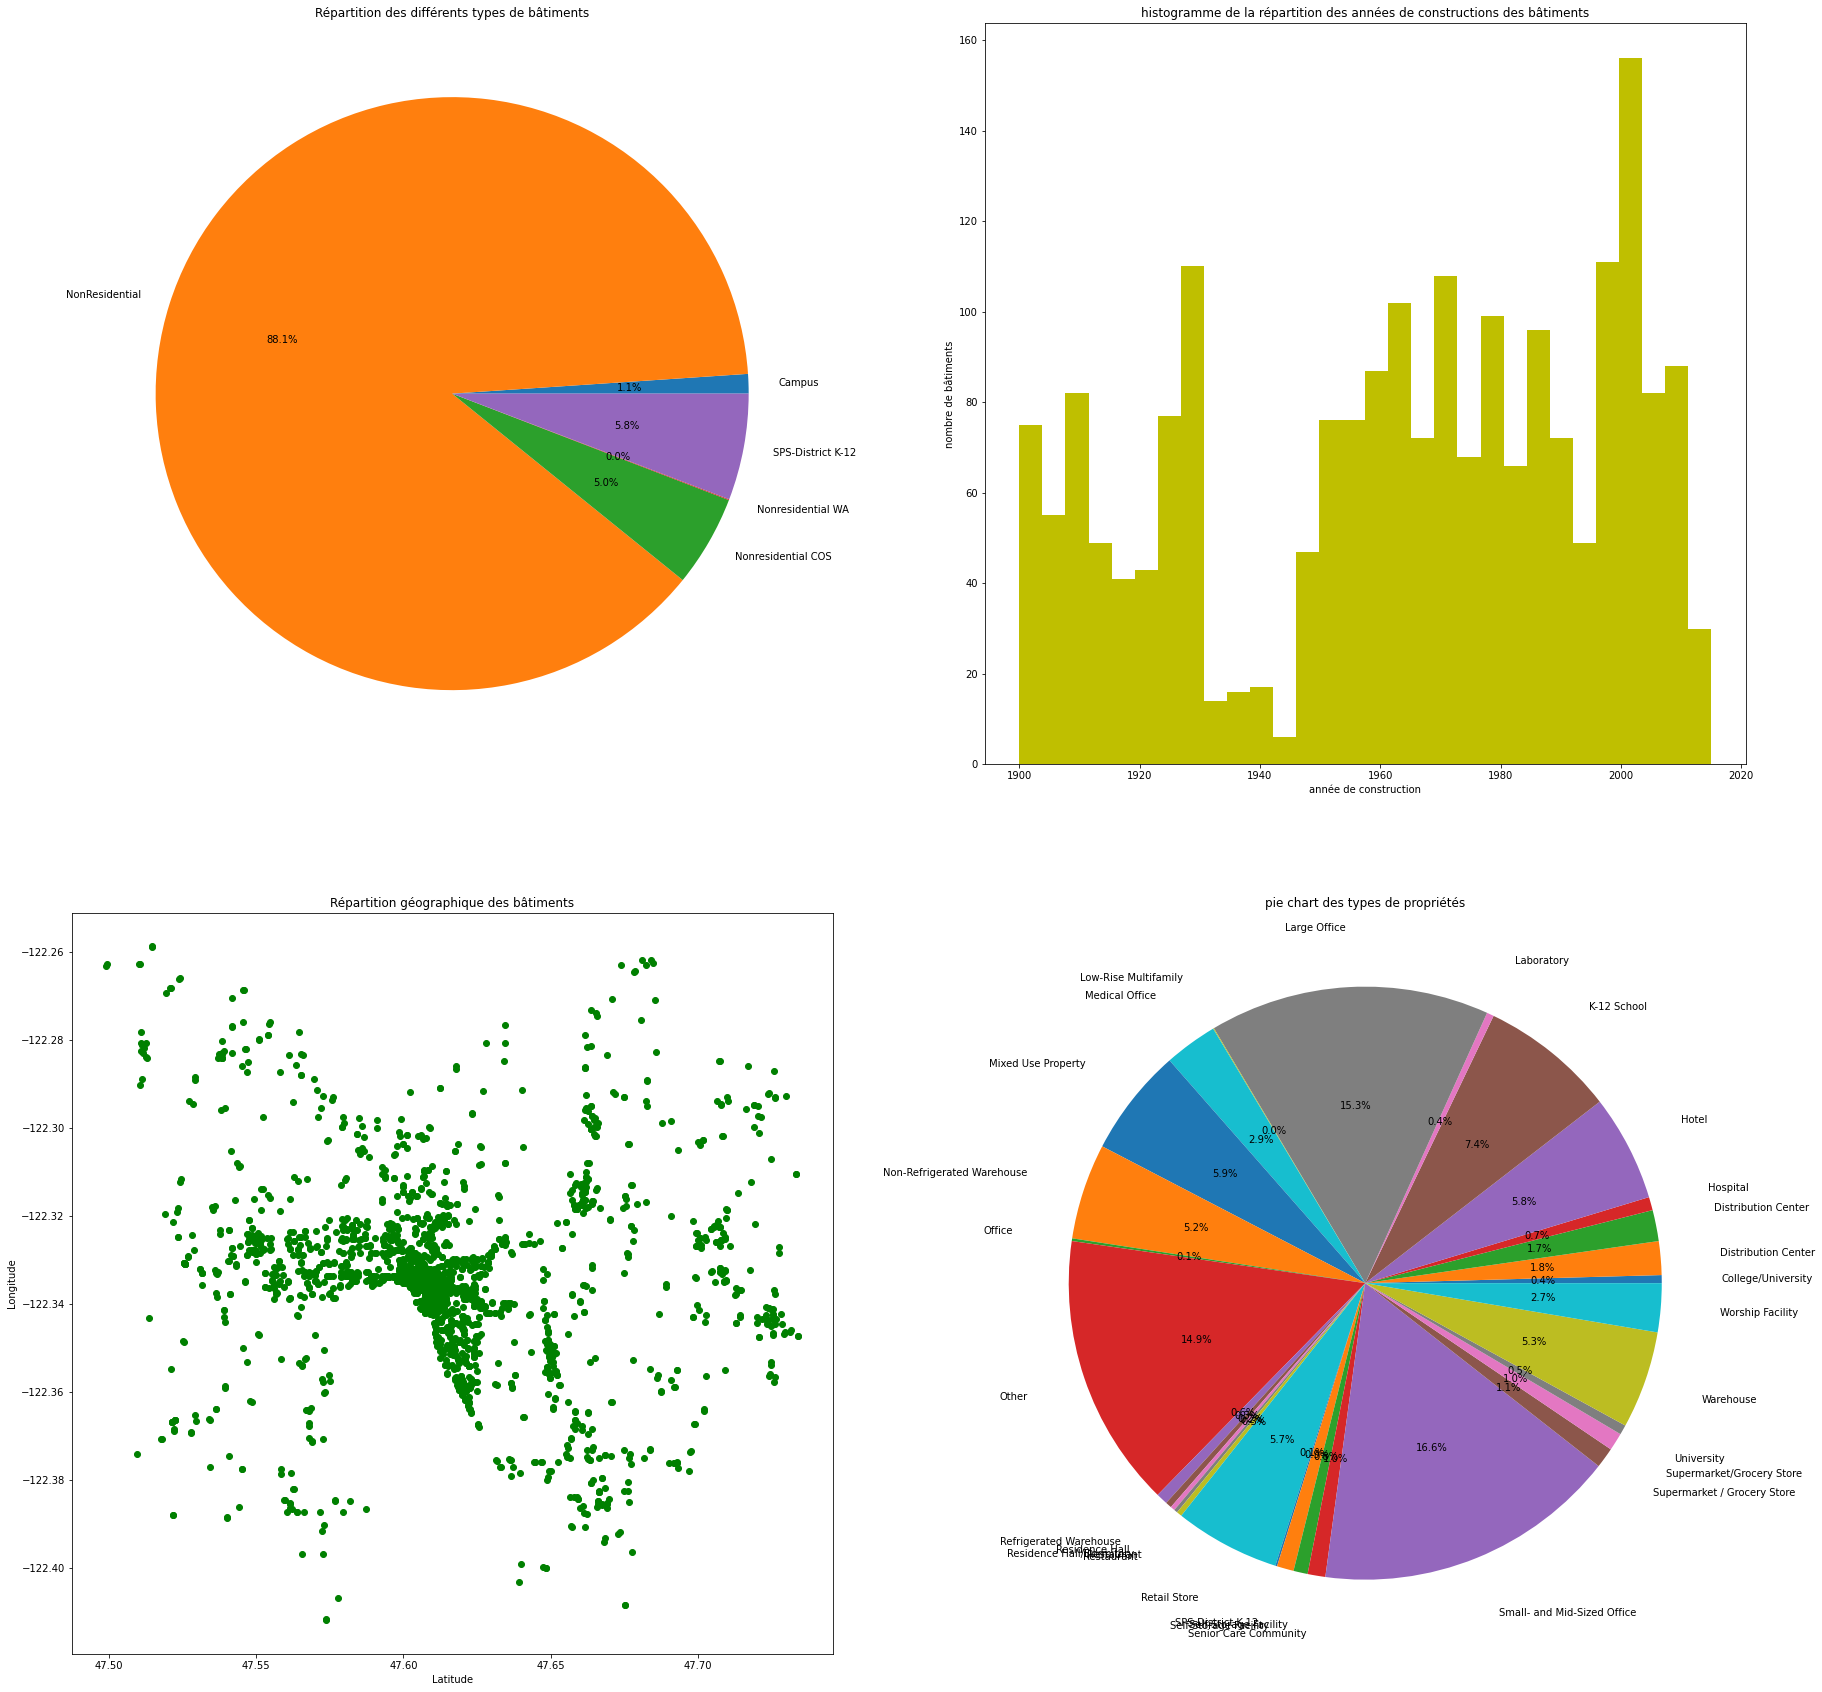

In [23]:
fig, axs = plt.subplots(2, 2,figsize = (30,30))

a = df.groupby('BuildingType').size()
laba = a.keys()

axs[0, 0].pie(a,labels = laba, autopct='%1.1f%%')
axs[0, 0].set_title('Répartition des différents types de bâtiments')


axs[0,1].hist(df['YearBuilt'],bins = 30,color = 'y')
axs[0,1].set_title('histogramme de la répartition des années de constructions des bâtiments')
axs[0,1].set_xlabel('année de construction')
axs[0,1].set_ylabel('nombre de bâtiments')


axs[1,0].scatter(df['Latitude'],df['Longitude'],color = 'g') 
axs[1,0].set_title('Répartition géographique des bâtiments')
axs[1,0].set_xlabel('Latitude')
axs[1,0].set_ylabel('Longitude')

b = df.groupby('PrimaryPropertyType').size()
labb = b.keys()
axs[1,1].pie(b,labels = labb,autopct='%1.1f%%',labeldistance = 1.2)
axs[1,1].set_title('pie chart des types de propriétés')
plt.show()

### Observation des corrélations des différents features avec les variables 'TotalGHGEmissions' et 'SiteEnergyUse(kBtu)'

In [24]:
### On effectue dans un premier temps une corrélation entre les variables numériques

df_num = df.select_dtypes(include = ['float64','int64'])


df_num.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))



,Unnamed: 0,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,ZipCode
Unnamed: 0,1.0,1.0,0.017,-0.25,-0.08,-0.039,-0.39,-0.62,-0.24,-0.63,-0.59,-0.092,-0.097,-0.11,-0.47,-0.18,-0.44,-0.17,-0.41,-0.036,-0.076,0.099,0.19
OSEBuildingID,1.0,1.0,0.023,-0.25,-0.081,-0.039,-0.4,-0.62,-0.24,-0.63,-0.59,-0.091,-0.097,-0.11,-0.47,-0.19,-0.44,-0.17,-0.41,-0.035,-0.076,0.098,0.19
DataYear,0.017,0.023,1.0,0.012,-0.008,-0.022,-0.00069,-0.0092,-0.0077,-0.01,-0.001,0.038,-0.0027,-0.0077,-0.0079,0.0037,-0.014,0.0011,-0.00018,0.13,0.0079,-0.0088,0.018
CouncilDistrictCode,-0.25,-0.25,0.012,1.0,-0.012,-0.035,0.49,0.23,0.3,0.19,0.17,0.075,0.19,0.23,0.26,0.25,0.28,-0.078,0.18,-0.0092,0.57,-0.4,-0.39
YearBuilt,-0.08,-0.081,-0.008,-0.012,1.0,0.017,0.11,0.31,0.4,0.25,0.31,0.015,0.17,0.23,0.29,-0.13,0.34,0.068,0.18,-0.056,0.15,-0.009,0.076
NumberofBuildings,-0.039,-0.039,-0.022,-0.035,0.017,1.0,-0.0023,0.081,0.0028,0.081,0.092,0.0048,0.04,0.028,0.084,0.023,0.077,0.043,0.077,0.039,0.0036,0.045,0.018
NumberofFloors,-0.39,-0.4,-0.00069,0.49,0.11,-0.0023,1.0,0.58,0.48,0.54,0.51,0.12,0.19,0.26,0.49,0.3,0.53,-0.072,0.33,-0.099,0.16,-0.072,-0.39
PropertyGFATotal,-0.62,-0.62,-0.0092,0.23,0.31,0.081,0.58,1.0,0.46,0.98,0.94,0.15,0.17,0.23,0.77,0.21,0.78,0.17,0.61,-0.063,0.038,-0.047,-0.22
PropertyGFAParking,-0.24,-0.24,-0.0077,0.3,0.4,0.0028,0.48,0.46,1.0,0.31,0.36,0.031,0.23,0.3,0.39,0.028,0.44,-0.044,0.22,-0.16,0.17,-0.11,-0.19
PropertyGFABuilding(s),-0.63,-0.63,-0.01,0.19,0.25,0.081,0.54,0.98,0.31,1.0,0.94,0.16,0.13,0.18,0.75,0.23,0.75,0.19,0.61,-0.037,-0.0016,-0.035,-0.2


Pour un coefficient de corrélation nettement inférieur à 0.60 on peut considérer que la colonne ne constituera pas un feature interressant pour la prédiction des variables.

On peut retenir les features suivants pour la prédiction de la variable 'TotalGHGEmissions':

- 'LargestPropertyUseTypeGFA'
- 'SiteEUI(kBtu/sf)	'
- 'SourceEUI(kBtu/sf)'
- 'SiteEnergyUse(kBtu)'
- 'Electricity(kWh)'
- 'NaturalGas(therms)'
- 'GHGEmissionsIntensity'
- 'PropertyGFAtotal'
- 'PropertyGFABuilding(s)'

On peut retenir les features suivants pour la prédiction de la variable 'SiteEnergyUse(kBtu)':

- 'LargestPropertyUseTypeGFA'
- 'SiteEUI(kBtu/sf)'
- 'SourceEUI(kBtu/sf)' 
- 'Electricity(kWh)'
- 'TotalGHGEmissions'
- 'PropertyGFATotal'
- 'PropertyGFABuilding(s)'

### Recherche des colonnes non-numériques pertinentes pour les prédiction de rejet de CO2 et de consommation electrique

In [9]:
df_non_num = df.select_dtypes(include = ['object'])
df_non_num.head()
list_non_num = df_non_num.columns
print(list_non_num)

Index(['BuildingType', 'PrimaryPropertyType', 'TaxParcelIdentificationNumber',
       'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'Address'],
      dtype='object')


NameError: name 'fig' is not defined

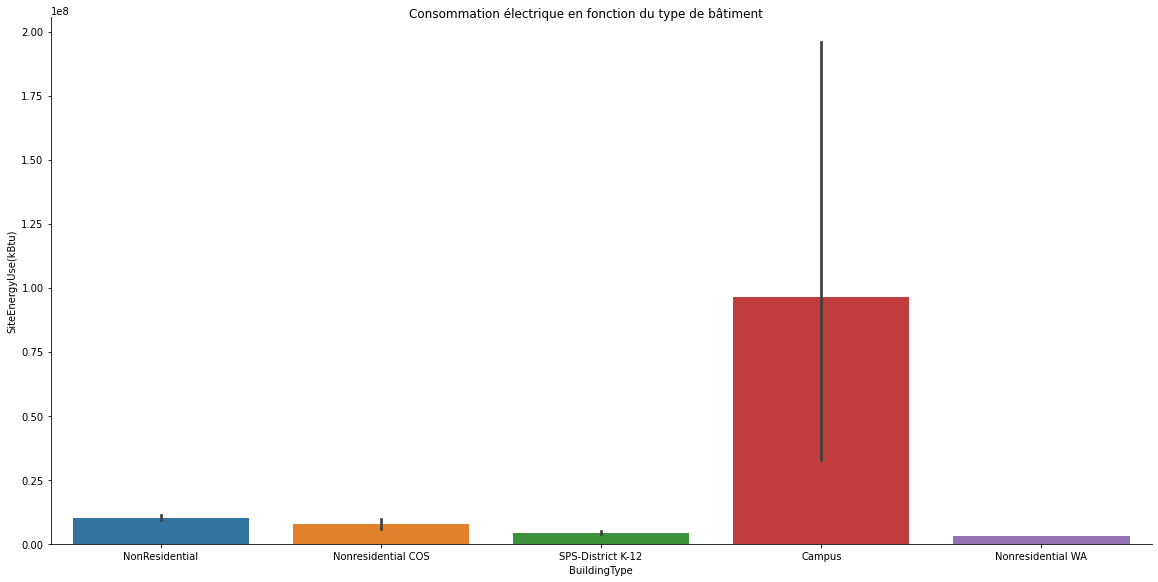

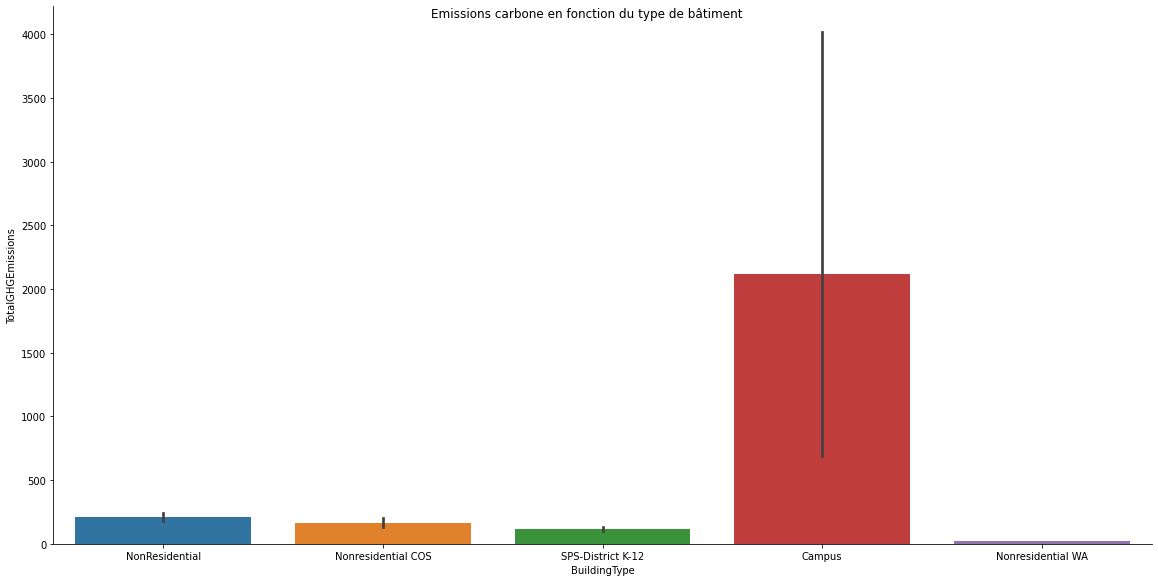

In [10]:
### recherche de corrélations entre variables non numériques et les variables à prédire

f = sns.catplot(x=df['BuildingType'], y=df['SiteEnergyUse(kBtu)'], data=df, height=8, aspect=2, kind='bar')
f.fig.suptitle('Consommation électrique en fonction du type de bâtiment')

g = sns.catplot(x=df['BuildingType'], y=df['TotalGHGEmissions'], data=df, height=8, aspect=2, kind='bar')
g.fig.suptitle('Emissions carbone en fonction du type de bâtiment')
fig.show()

Selon les graphiques obtenus ci-dessus on peut voir que les bâtiments de types Campus ont une consommation électrique et une émission en CO2 bien supérieure à la moyenne, il faudra prendre en compte cette variable dans la prédiction. Pour les autres types de bâtiment cela influe peu. 

<ipython-input-17-154b648129b9>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


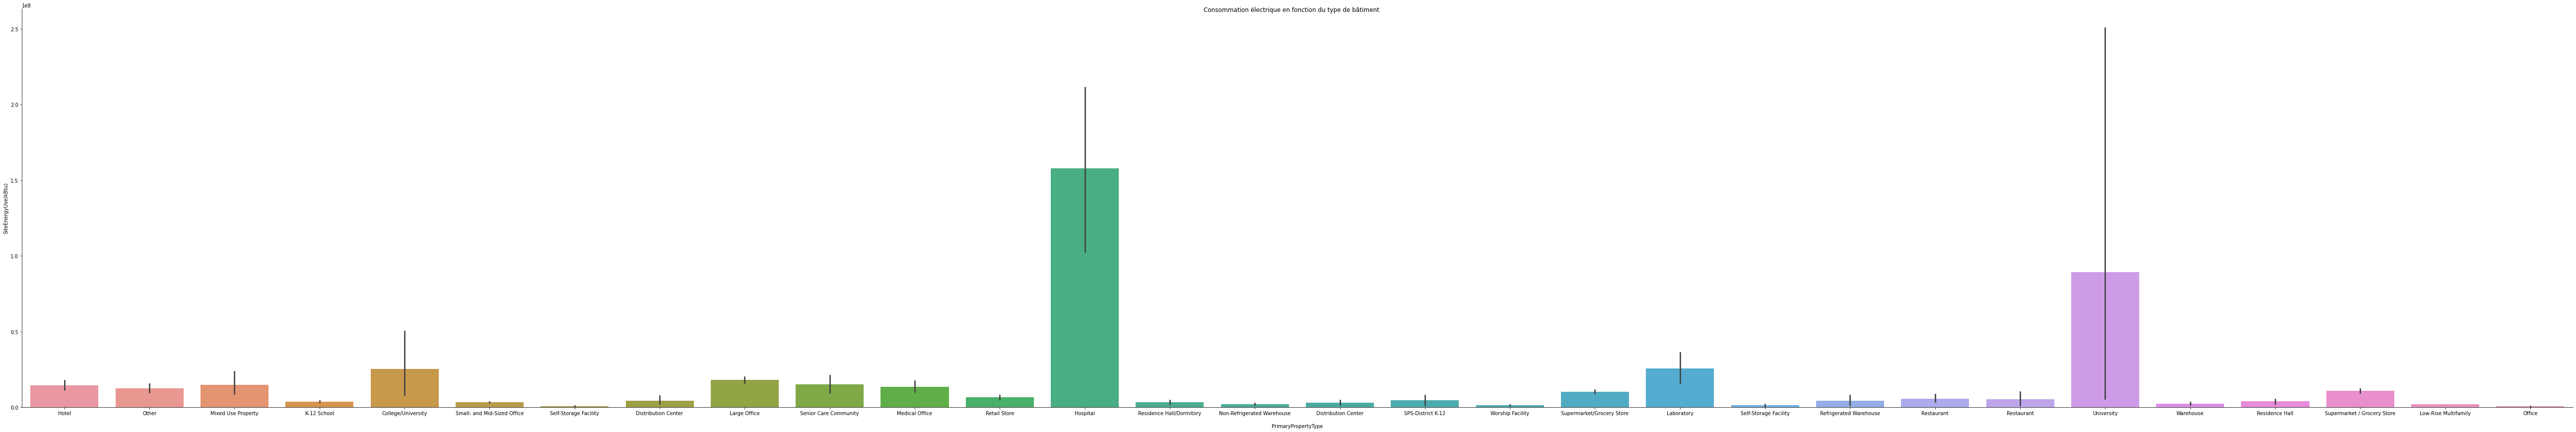

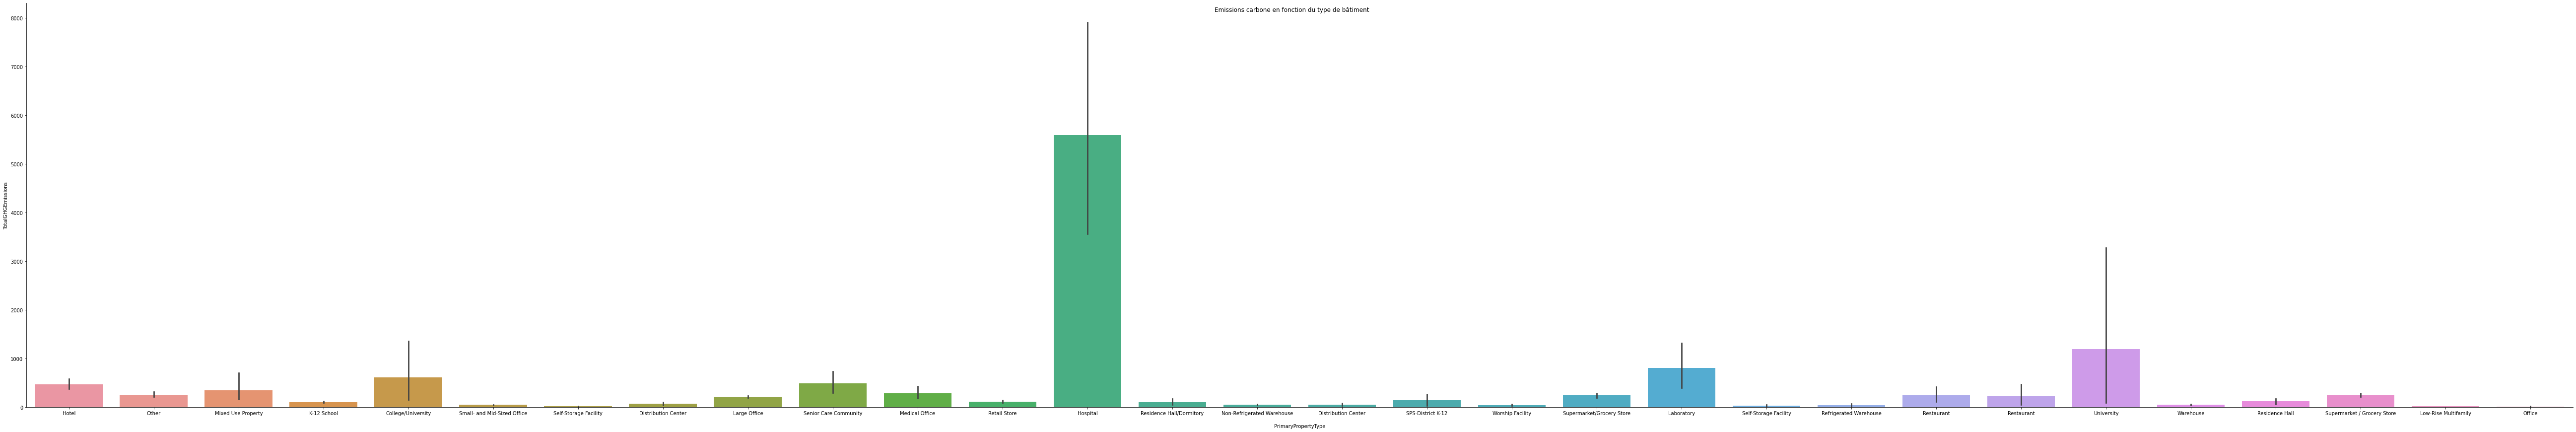

In [17]:
f = sns.catplot(x=df['PrimaryPropertyType'], y=df['SiteEnergyUse(kBtu)'], data=df, height=12, aspect=6, kind='bar')
f.fig.suptitle('Consommation électrique en fonction du type de bâtiment')

g = sns.catplot(x=df['PrimaryPropertyType'], y=df['TotalGHGEmissions'], data=df, height=12, aspect=6, kind='bar')
g.fig.suptitle('Emissions carbone en fonction du type de bâtiment')
fig.show()

On remarque que les bâtiments de type 'hospital' sont les plus gourmands en énergie et dans une moindre mesure les bâtiments de type université (ce qui correspond à ce qui a été mis en évidence au dessus à propos des campus).

In [11]:
#Retrait des lignes inutiles pour la prédiction 

df.drop(['TaxParcelIdentificationNumber','Neighborhood','LargestPropertyUseType','Address','CouncilDistrictCode','ListOfAllPropertyUseTypes'],axis = 1, inplace = True)
print(df.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2070 non-null   int64  
 1   OSEBuildingID              2070 non-null   int64  
 2   DataYear                   2070 non-null   int64  
 3   BuildingType               2070 non-null   object 
 4   PrimaryPropertyType        2070 non-null   object 
 5   YearBuilt                  2070 non-null   int64  
 6   NumberofBuildings          2068 non-null   float64
 7   NumberofFloors             2067 non-null   float64
 8   PropertyGFATotal           2070 non-null   int64  
 9   PropertyGFAParking         2070 non-null   int64  
 10  PropertyGFABuilding(s)     2070 non-null   int64  
 11  LargestPropertyUseTypeGFA  2018 non-null   float64
 12  ENERGYSTARScore            1455 non-null   float64
 13  SiteEUI(kBtu/sf)           2065 non-null   float

### Création d'encodeur pour les deux colonnes non numériques

In [27]:
df.loc[df.BuildingType =='Campus','BuildingType']= 1
df.loc[df.BuildingType !=1, 'BuildingType']=0

df['BuildingType'] = pd.to_numeric(df['BuildingType'])
# df['BuildingType'].value_counts()

df.loc[df.PrimaryPropertyType =='Hospital','PrimaryPropertyType']= 1
df.loc[df.PrimaryPropertyType !=1, 'PrimaryPropertyType']=0

df['PrimaryPropertyType'] = pd.to_numeric(df['PrimaryPropertyType'])
# df['PrimaryPropertyType'].value_counts()


df = df.drop(df.columns[[0]], axis=1)
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,ZipCode
0,1,2015,0,0,1927,1.0,12.0,88434,0,88434,...,173.5,6981428.0,2023032.0,1080307.0,12724.0,249.43,2.64,47.612190,-122.337997,98101.0
1,2,2015,0,0,1996,1.0,11.0,103566,15064,88502,...,191.3,8354235.0,0.0,1144563.0,44490.0,263.51,2.38,47.613106,-122.333358,98101.0
2,3,2015,0,0,1969,1.0,41.0,961990,0,961990,...,242.7,73130656.0,19660404.0,14583930.0,37099.0,2061.48,1.92,47.613349,-122.337699,98101.0
3,5,2015,0,0,1926,1.0,10.0,61320,0,61320,...,636.3,28229320.0,23458518.0,811521.0,20019.0,1936.34,31.38,47.614216,-122.336609,98101.0
4,8,2015,0,0,1980,1.0,18.0,119890,12460,107430,...,228.8,14829099.0,0.0,1777841.0,87631.0,507.70,4.02,47.613754,-122.340924,98121.0


In [28]:
print(df.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              2070 non-null   int64  
 1   DataYear                   2070 non-null   int64  
 2   BuildingType               2070 non-null   int64  
 3   PrimaryPropertyType        2070 non-null   int64  
 4   YearBuilt                  2070 non-null   int64  
 5   NumberofBuildings          2068 non-null   float64
 6   NumberofFloors             2067 non-null   float64
 7   PropertyGFATotal           2070 non-null   int64  
 8   PropertyGFAParking         2070 non-null   int64  
 9   PropertyGFABuilding(s)     2070 non-null   int64  
 10  LargestPropertyUseTypeGFA  2018 non-null   float64
 11  ENERGYSTARScore            1455 non-null   float64
 12  SiteEUI(kBtu/sf)           2065 non-null   float64
 13  SourceEUI(kBtu/sf)         2065 non-null   float

In [29]:
#Importation de la database finale 

df.to_csv('building-energy-benchmarking_final_features.csv',sep = ',')